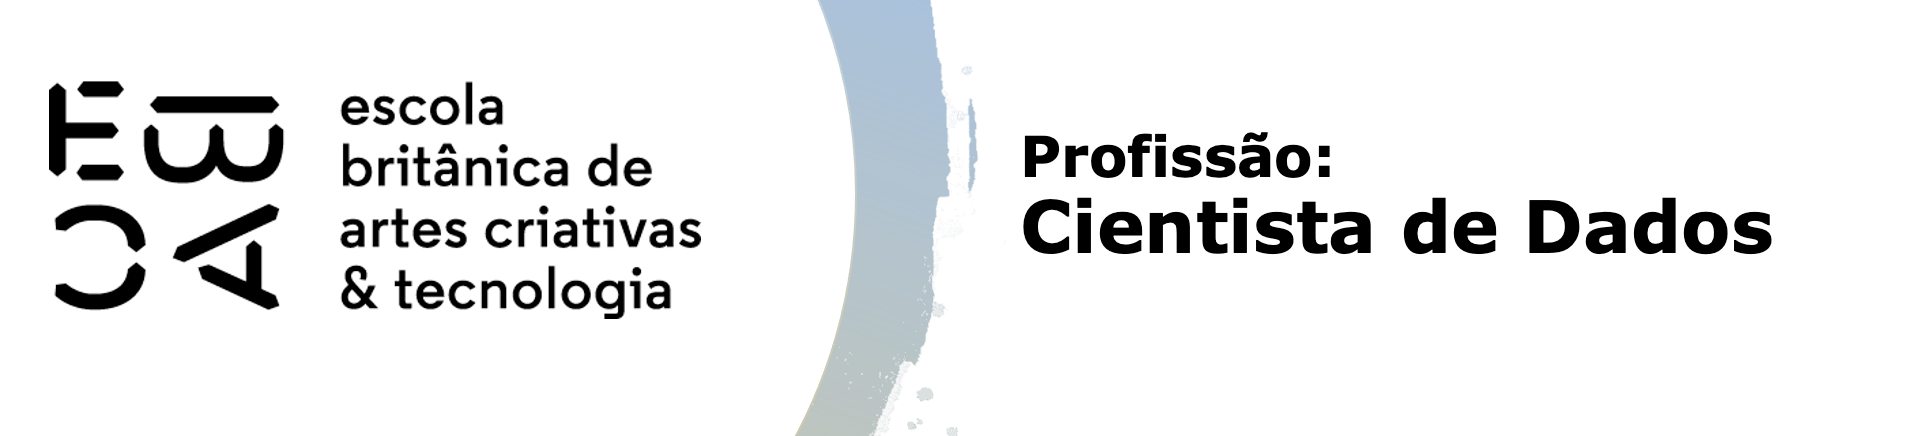

# Tarefa

In [87]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as st
from scipy.stats import t

In [88]:
pg = sns.load_dataset('penguins')

pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


In [89]:
pg.isna().sum().sum()

19

In [90]:
pg.dropna(inplace = True)

<Axes: xlabel='sex', ylabel='body_mass_g'>

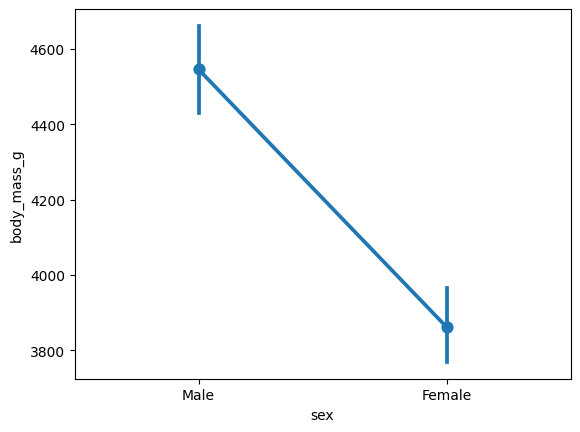

In [91]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [92]:
pg.groupby('sex')['body_mass_g'].var().mean()**.5

729.4328134642673

In [93]:
desvpad = pg.groupby('sex')['body_mass_g'].var().mean()**.5
media_Male = pg.groupby('sex')['body_mass_g'].mean()['Male']
media_Female = pg.groupby('sex')['body_mass_g'].mean()['Female']

diferença = media_Male - media_Female # Numerador da fórmula
erro_padrao = desvpad*((2/10)**.5) # variância amostral*raiz(2/n)
valor_t = diferença/erro_padrao     # Estatística do teste
RC = st.t.ppf(.95, 18)        # Região crítica: sob h0, t está na RC 5% das vezes
p_value=1-st.t.cdf(valor_t, 18)     # p-value: a menor significância para a qual rejeitamos o teste

print(f'diferença: {diferença:.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {erro_padrao:.2f}')
print(f'estatística do teste: {valor_t:.2f}')
print(f'região crítica: {RC:.2f} ou mais')
print(f'p-value: {p_value:.5f} ou mais')

diferença: 683.41
desvio padrão: 729.43
erro padrão: 326.21
estatística do teste: 2.09
região crítica: 1.73 ou mais
p-value: 0.02529 ou mais


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

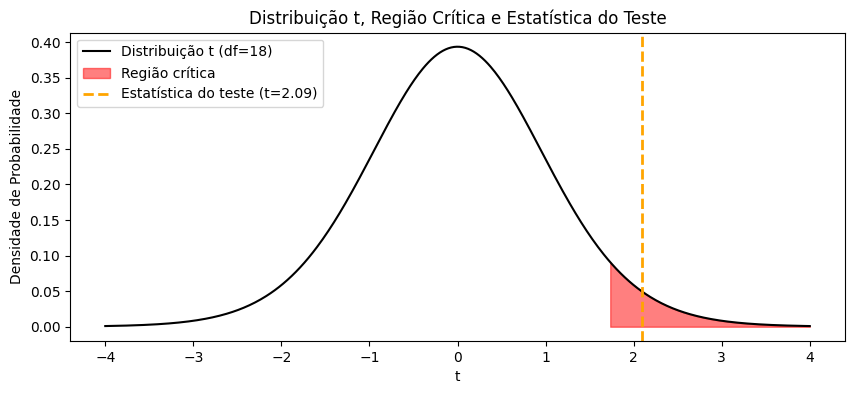

In [94]:
# Distribuição t
x = np.linspace(-4, 4, 500)
y = t.pdf(x, 18)

plt.figure(figsize=(10, 4))
plt.plot(x, y, label='Distribuição t (df=18)', color='black')

x_rc = np.linspace(RC, 4, 200)
y_rc = t.pdf(x_rc, 18)
plt.fill_between(x_rc, y_rc, color='red', alpha=0.5, label='Região crítica')

# Estatística do teste
plt.axvline(valor_t, color='orange', linestyle='--', linewidth=2, label=f'Estatística do teste (t={valor_t:.2f})')

# Ajustes no gráfico
plt.title('Distribuição t, Região Crítica e Estatística do Teste')
plt.xlabel('t')
plt.ylabel('Densidade de Probabilidade')
plt.legend(loc='upper left')
plt.show()

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [95]:
pg.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

<Axes: xlabel='species', ylabel='body_mass_g'>

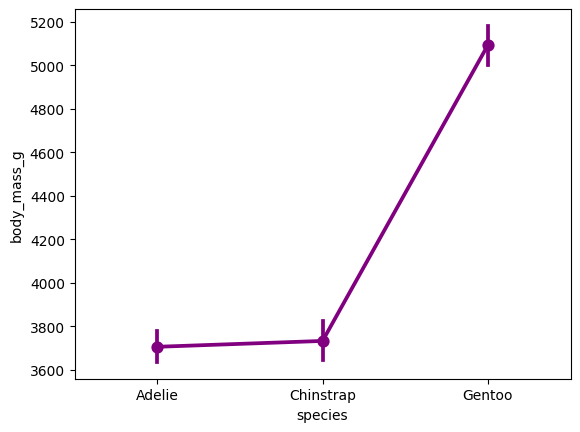

In [96]:
sns.pointplot(data=pg, x='species', y = 'body_mass_g', color = "purple")

In [97]:
desvpad = pg.groupby('species')['body_mass_g'].var().mean()**.5
media_Gentoo = pg.groupby('species')['body_mass_g'].mean()['Gentoo']
media_Chinstrap = pg.groupby('species')['body_mass_g'].mean()['Chinstrap']
media_Adelie = pg.groupby('species')['body_mass_g'].mean()['Adelie']


diferença_Chinstrap = media_Gentoo - media_Chinstrap # Numerador da fórmula
diferença_Adelie = media_Gentoo - media_Adelie

erro_padrao = desvpad*((2/10)**.5) # variância amostral*raiz(2/n)
RC = st.t.ppf(.95, 18)        # Região crítica: sob h0, t está na RC 5% das vezes

valor_t_C = diferença_Chinstrap/erro_padrao     # Estatística do teste
p_value_C=1-st.t.cdf(valor_t_C, 18)     # p-value: a menor significância para a qual rejeitamos o teste

valor_t_A = diferença_Adelie/erro_padrao         
p_value_A=1-st.t.cdf(valor_t_A, 18)

print('Resultados:')
print(f'diferença entre Gentoo e Chinstrap: {diferença_Chinstrap:.2f}')
print(f'diferença entre Gentoo e Adelie: {diferença_Adelie:.2f}\n')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {erro_padrao:.2f}')
print(f'região crítica: {RC:.2f} ou mais\n')
print(f'estatística do teste Chinstrap: {valor_t_C:.2f}')
print(f'estatística do teste Adelie: {valor_t_A:.2f}\n')
print(f'p-value Chinstrap: {p_value_C:.5f} ou mais')
print(f'p-value Adelie: {p_value_A:.5f} ou mais')

Resultados:
diferença entre Gentoo e Chinstrap: 1359.35
diferença entre Gentoo e Adelie: 1386.27

desvio padrão: 450.75
erro padrão: 201.58
região crítica: 1.73 ou mais

estatística do teste Chinstrap: 6.74
estatística do teste Adelie: 6.88

p-value Chinstrap: 0.00000 ou mais
p-value Adelie: 0.00000 ou mais
